In [1]:
%load_ext sql
%sql sqlite://

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats, integrate
np.random.seed(sum(map(ord, "distributions")))

In [3]:
#install cufflinks via anaconda prompt using these commands - pip install plotly & pip install cufflinks
#install library packages
import plotly
import cufflinks as cf

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline

In [4]:
import sqlalchemy as db

In [5]:
#Download database
USImmig = pd.read_csv('C:\\Users\\mmora\\OneDrive\\Professional Development\\1GC_BigData\\BDAT 1000 Data Manipulation\\Assignment 2\\Migration Col to World\\USImmigrationCountryOfResidence 2017_table2.csv')

In [6]:
#Display number of rows and columns
USImmig.shape

(88, 28)

In [7]:
#Preview the first 10 rows 
USImmig.head(10)

,LastResidence,1820-1829,1830-1839,1840-1849,1850-1859,1860-1869,1870-1879,1880-1889,1890-1899,1900-1909,...,1990-1999,2000-2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Total,128502,538381,1427337,2814554,2081261,2742137,5248568,3694294,8202388,...,9775398,10299430,1042625,1062040,1031631,990553,1016518,1051031,1183505,1127167
1,Europe,99618,422853,1369423,2622617,1880389,2252050,4638684,3576411,7572569,...,1349219,1349609,95429,90712,86956,91095,87790,90789,98043,89706
2,Austria-Hungary,0,0,0,0,3375,60127,314787,534059,2001376,...,27529,33929,4325,4703,3208,2061,2058,2965,2620,2886
3,Austria,0,0,0,0,2700,54529,204805,268218,532416,...,18234,21151,3319,3654,2199,1053,1088,1928,1621,1962
4,Hungary,0,0,0,0,483,5598,109982,203350,685567,...,9295,12778,1006,1049,1009,1008,970,1037,999,924
5,Belgium,28,20,3996,5765,5785,6991,18738,19642,37429,...,7077,8157,732,700,698,803,775,809,821,742
6,Bulgaria4,0,0,0,0,0,0,0,52,34651,...,16948,40003,2465,2549,2322,2720,2886,2585,2560,2070
7,Czechoslovakia,0,0,0,0,0,0,0,0,0,...,8970,18691,1510,1374,1316,1258,1168,1236,1299,1142
8,Denmark,173,927,671,3227,13553,29278,85342,56671,61227,...,6189,6049,545,473,492,546,533,634,562,536
9,Finland6,0,0,0,0,3,286,9617,36719,0,...,3970,3970,414,398,373,360,368,397,512,478


In [8]:
#Dropping Columns Not Needed
USImmig.drop(USImmig.columns.difference(['LastResidence','2012','2013','2014','2015','2016','2017']), 1, inplace=True)

#Show first 10 rows
USImmig.head(10)

,LastResidence,2012,2013,2014,2015,2016,2017
0,Total,1031631,990553,1016518,1051031,1183505,1127167
1,Europe,86956,91095,87790,90789,98043,89706
2,Austria-Hungary,3208,2061,2058,2965,2620,2886
3,Austria,2199,1053,1088,1928,1621,1962
4,Hungary,1009,1008,970,1037,999,924
5,Belgium,698,803,775,809,821,742
6,Bulgaria4,2322,2720,2886,2585,2560,2070
7,Czechoslovakia,1316,1258,1168,1236,1299,1142
8,Denmark,492,546,533,634,562,536
9,Finland6,373,360,368,397,512,478


In [9]:
#Describe the data
USImmig.describe()

,2012,2013,2014,2015,2016,2017
count,8.800000e+01,88.000000,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01
mean,3.789178e+04,36476.704545,3.743164e+04,3.875050e+04,4.366705e+04,4.167472e+04
std,1.260971e+05,120759.953391,1.244451e+05,1.287780e+05,1.449697e+05,1.380298e+05
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.582750e+03,1630.250000,1.473500e+03,1.550500e+03,1.653250e+03,1.516000e+03
50%,5.434000e+03,5450.000000,5.074500e+03,5.173500e+03,5.339500e+03,4.876500e+03
75%,1.768325e+04,18274.250000,1.762800e+04,1.683425e+04,2.128325e+04,1.910950e+04
max,1.031631e+06,990553.000000,1.016518e+06,1.051031e+06,1.183505e+06,1.127167e+06


In [10]:
#Drop rows with NaN
USImmig.dropna()
USImmig

,LastResidence,2012,2013,2014,2015,2016,2017
0,Total,1031631,990553,1016518,1051031,1183505,1127167
1,Europe,86956,91095,87790,90789,98043,89706
2,Austria-Hungary,3208,2061,2058,2965,2620,2886
3,Austria,2199,1053,1088,1928,1621,1962
4,Hungary,1009,1008,970,1037,999,924
...,...,...,...,...,...,...,...
83,Oceania,5573,6061,5980,6227,6489,5986
84,Australia,3146,3529,3582,3795,4173,3818
85,New Zealand,980,1027,941,978,939,900
86,Other Oceania,1447,1505,1457,1454,1377,1268


In [11]:
#Checking data type of dataframe
print (USImmig.dtypes)

LastResidence    object
2012              int64
2013              int64
2014              int64
2015              int64
2016              int64
2017              int64
dtype: object


In [12]:
#Change dtype of LastResidence to string
USImmig['LastResidence'] = USImmig['LastResidence'].astype('string')
print (USImmig.dtypes)

LastResidence    string
2012              int64
2013              int64
2014              int64
2015              int64
2016              int64
2017              int64
dtype: object


In [13]:
#Drop Continents
update_USImmig = USImmig.drop([0,1,2,16,27,28,42,43,46,52,60,61,74,75,76,82,83,86,87])

#Show first 10 rows
update_USImmig.head(10)

,LastResidence,2012,2013,2014,2015,2016,2017
3,Austria,2199,1053,1088,1928,1621,1962
4,Hungary,1009,1008,970,1037,999,924
5,Belgium,698,803,775,809,821,742
6,Bulgaria4,2322,2720,2886,2585,2560,2070
7,Czechoslovakia,1316,1258,1168,1236,1299,1142
8,Denmark,492,546,533,634,562,536
9,Finland6,373,360,368,397,512,478
10,France,4201,4668,4544,5034,5473,4973
11,Germany,6732,6880,6387,5965,5895,5369
12,Greece,1264,1526,1388,1330,1664,1495


In [14]:
#Sorting values descending for column Colombia
update_USImmig.sort_values(by=['2017'], ascending=False) 

,LastResidence,2012,2013,2014,2015,2016,2017
45,Mexico,145326,134198,133107,157227,172726,168980
29,China,78184,68410,72492,70977,77658,66479
47,Cuba,32551,31343,46505,54178,66120,64749
48,Dominican Republic,41535,41487,44550,50382,60613,58384
31,India,63320,65506,74451,61380,61691,57155
...,...,...,...,...,...,...,...
8,Denmark,492,546,533,634,562,536
9,Finland6,373,360,368,397,512,478
17,Norway,314,389,332,357,404,377
69,Paraguay,454,437,363,353,400,364


In [15]:
#Calculating proportion of immigrants from each country in dataframe
update_USImmig['ImmPercent2017'] = (update_USImmig['2017'] / 
                  update_USImmig['2017'].sum()) * 100

#Calculating proportion of Colombians migrating to each country in dataframe
update_USImmig['ImmPercent2012'] = (update_USImmig['2012'] / 
                  update_USImmig['2012'].sum()) * 100

In [16]:
update_USImmig

,LastResidence,2012,2013,2014,2015,2016,2017,ImmPercent2017,ImmPercent2012
3,Austria,2199,1053,1088,1928,1621,1962,0.224524,0.270185
4,Hungary,1009,1008,970,1037,999,924,0.105739,0.123973
5,Belgium,698,803,775,809,821,742,0.084912,0.085761
6,Bulgaria4,2322,2720,2886,2585,2560,2070,0.236883,0.285298
7,Czechoslovakia,1316,1258,1168,1236,1299,1142,0.130686,0.161693
...,...,...,...,...,...,...,...,...,...
79,Liberia,3451,3036,3681,3580,3545,4085,0.467472,0.424015
80,Morocco,3534,3202,3495,3569,4447,4066,0.465298,0.434213
81,South Africa,2960,2693,2871,3298,3441,3438,0.393432,0.363687
84,Australia,3146,3529,3582,3795,4173,3818,0.436918,0.386541


In [17]:
#update_USImmig

In [18]:
update_USImmig.sort_values(by=['2017'], ascending=False) 

,LastResidence,2012,2013,2014,2015,2016,2017,ImmPercent2017,ImmPercent2012
45,Mexico,145326,134198,133107,157227,172726,168980,19.337437,17.855818
29,China,78184,68410,72492,70977,77658,66479,7.607607,9.606259
47,Cuba,32551,31343,46505,54178,66120,64749,7.409633,3.999454
48,Dominican Republic,41535,41487,44550,50382,60613,58384,6.681246,5.103295
31,India,63320,65506,74451,61380,61691,57155,6.540604,7.779959
...,...,...,...,...,...,...,...,...,...
8,Denmark,492,546,533,634,562,536,0.061338,0.060451
9,Finland6,373,360,368,397,512,478,0.054701,0.045830
17,Norway,314,389,332,357,404,377,0.043142,0.038580
69,Paraguay,454,437,363,353,400,364,0.041655,0.055782


In [19]:
#Calculated percent change from 2012 to 2017
update_USImmig['PerChg'] = (update_USImmig['ImmPercent2017'] - 
                  update_USImmig['ImmPercent2012'])
update_USImmig

,LastResidence,2012,2013,2014,2015,2016,2017,ImmPercent2017,ImmPercent2012,PerChg
3,Austria,2199,1053,1088,1928,1621,1962,0.224524,0.270185,-0.045661
4,Hungary,1009,1008,970,1037,999,924,0.105739,0.123973,-0.018234
5,Belgium,698,803,775,809,821,742,0.084912,0.085761,-0.000850
6,Bulgaria4,2322,2720,2886,2585,2560,2070,0.236883,0.285298,-0.048415
7,Czechoslovakia,1316,1258,1168,1236,1299,1142,0.130686,0.161693,-0.031007
...,...,...,...,...,...,...,...,...,...,...
79,Liberia,3451,3036,3681,3580,3545,4085,0.467472,0.424015,0.043457
80,Morocco,3534,3202,3495,3569,4447,4066,0.465298,0.434213,0.031085
81,South Africa,2960,2693,2871,3298,3441,3438,0.393432,0.363687,0.029745
84,Australia,3146,3529,3582,3795,4173,3818,0.436918,0.386541,0.050377


In [20]:
#Identifying the top 15 countries where US immigrants migrated from in 2017
update_USImmig.nlargest(15,'ImmPercent2017')

,LastResidence,2012,2013,2014,2015,2016,2017,ImmPercent2017,ImmPercent2012,PerChg
45,Mexico,145326,134198,133107,157227,172726,168980,19.337437,17.855818,1.481619
29,China,78184,68410,72492,70977,77658,66479,7.607607,9.606259,-1.998652
47,Cuba,32551,31343,46505,54178,66120,64749,7.409633,3.999454,3.410178
48,Dominican Republic,41535,41487,44550,50382,60613,58384,6.681246,5.103295,1.577951
31,India,63320,65506,74451,61380,61691,57155,6.540604,7.779959,-1.239356
37,Philippines,55441,52955,48633,54307,50609,46542,5.326092,6.811888,-1.485796
41,Vietnam,27578,26578,29825,30332,40412,37541,4.296051,3.388435,0.907616
55,El Salvador,15874,18015,18964,18699,21268,21920,2.508443,1.950396,0.558047
50,Jamaica,20300,19052,18804,17362,22833,21517,2.462325,2.494207,-0.031882
49,Haiti,22446,20083,15107,16787,23185,21501,2.460494,2.757880,-0.297386


In [21]:
#Identifying the top 10 countries where US immigrants have migrated from and have increased
update_USImmig.nlargest(15,'PerChg')

,LastResidence,2012,2013,2014,2015,2016,2017,ImmPercent2017,ImmPercent2012,PerChg
47,Cuba,32551,31343,46505,54178,66120,64749,7.409633,3.999454,3.410178
48,Dominican Republic,41535,41487,44550,50382,60613,58384,6.681246,5.103295,1.577951
45,Mexico,145326,134198,133107,157227,172726,168980,19.337437,17.855818,1.481619
41,Vietnam,27578,26578,29825,30332,40412,37541,4.296051,3.388435,0.907616
55,El Salvador,15874,18015,18964,18699,21268,21920,2.508443,1.950396,0.558047
57,Honduras,6773,8795,8025,9071,12996,11147,1.275621,0.832180,0.443440
64,Brazil,11248,10772,10246,11247,13528,14832,1.697318,1.382012,0.315307
56,Guatemala,9857,9829,9871,11466,12548,12792,1.463868,1.211103,0.252765
73,Venezuela,9464,9512,8289,8985,10590,11465,1.312012,1.162816,0.149195
40,Turkey,7362,7189,7248,8762,8635,9144,1.046405,0.904549,0.141856


In [22]:
#Creating dataframe with only top 15 countries immigrants migrated from 
USImmigTop15 = update_USImmig.drop(update_USImmig[update_USImmig['ImmPercent2017'] < 1.69].index)
USImmigTop15

,LastResidence,2012,2013,2014,2015,2016,2017,ImmPercent2017,ImmPercent2012,PerChg
29,China,78184,68410,72492,70977,77658,66479,7.607607,9.606259,-1.998652
31,India,63320,65506,74451,61380,61691,57155,6.540604,7.779959,-1.239356
36,Korea,20802,22937,20313,16976,21329,18559,2.123822,2.555886,-0.432064
37,Philippines,55441,52955,48633,54307,50609,46542,5.326092,6.811888,-1.485796
41,Vietnam,27578,26578,29825,30332,40412,37541,4.296051,3.388435,0.907616
44,Canada and Newfoundland,20138,20489,17670,19309,19349,18469,2.113523,2.474302,-0.360779
45,Mexico,145326,134198,133107,157227,172726,168980,19.337437,17.855818,1.481619
47,Cuba,32551,31343,46505,54178,66120,64749,7.409633,3.999454,3.410178
48,Dominican Republic,41535,41487,44550,50382,60613,58384,6.681246,5.103295,1.577951
49,Haiti,22446,20083,15107,16787,23185,21501,2.460494,2.757880,-0.297386


In [23]:
#Sorting Descending by Colombia
USImmigTop15 = USImmigTop15.sort_values(by='ImmPercent2017',ascending=False)
USImmigTop15

,LastResidence,2012,2013,2014,2015,2016,2017,ImmPercent2017,ImmPercent2012,PerChg
45,Mexico,145326,134198,133107,157227,172726,168980,19.337437,17.855818,1.481619
29,China,78184,68410,72492,70977,77658,66479,7.607607,9.606259,-1.998652
47,Cuba,32551,31343,46505,54178,66120,64749,7.409633,3.999454,3.410178
48,Dominican Republic,41535,41487,44550,50382,60613,58384,6.681246,5.103295,1.577951
31,India,63320,65506,74451,61380,61691,57155,6.540604,7.779959,-1.239356
37,Philippines,55441,52955,48633,54307,50609,46542,5.326092,6.811888,-1.485796
41,Vietnam,27578,26578,29825,30332,40412,37541,4.296051,3.388435,0.907616
55,El Salvador,15874,18015,18964,18699,21268,21920,2.508443,1.950396,0.558047
50,Jamaica,20300,19052,18804,17362,22833,21517,2.462325,2.494207,-0.031882
49,Haiti,22446,20083,15107,16787,23185,21501,2.460494,2.757880,-0.297386


In [32]:
#Exporting dataframe to Excel for Visualization in Tableau
USImmigTop15.to_excel(r'C:\Users\mmora\OneDrive\Professional Development\1GC_BigData\BDAT 1000 Data Manipulation\Assignment 2\From Python\USlawImm2017_clean.xlsx', index = False)

Text(0.5, 1.0, 'Top 15 countries immigrants came to US in 2017')

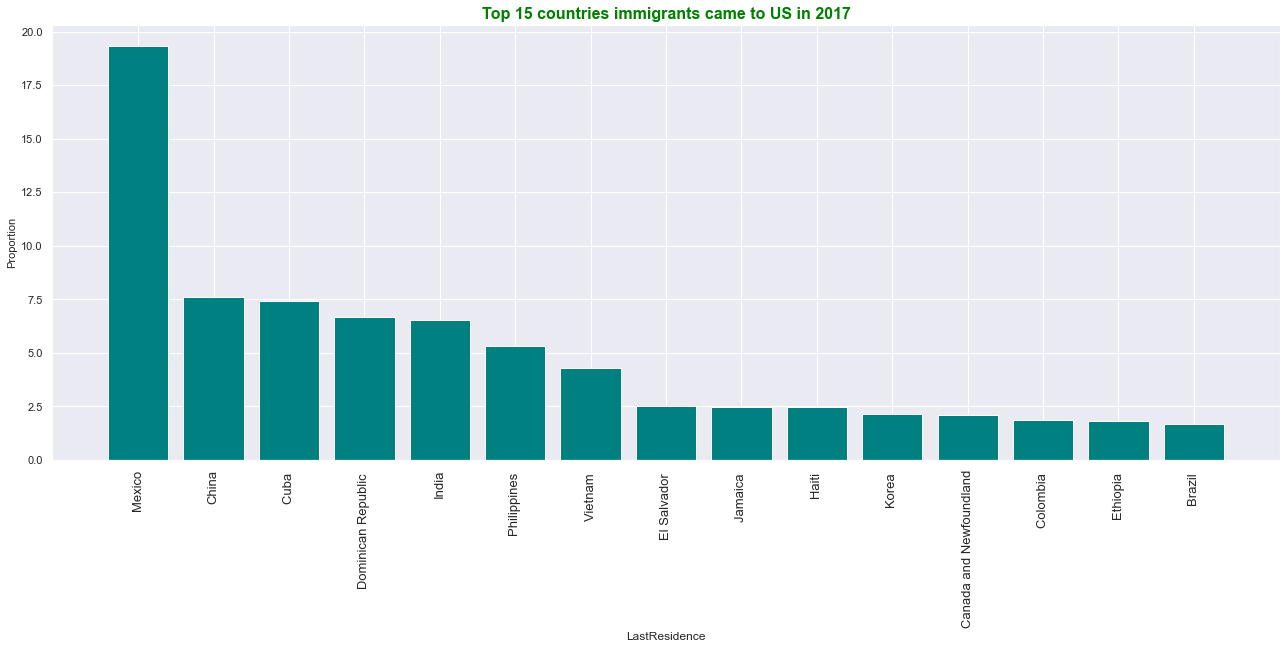

In [24]:
#Visualize Top 15 countries immigrants came to US in 2017 with matplotlib 
USImmigTop15 = USImmigTop15.sort_values(by='ImmPercent2017',ascending=False)
plt.figure(figsize = (22,8))
plt.bar(x =USImmigTop15['LastResidence'],
        height=USImmigTop15['ImmPercent2017'],
        color='teal')
plt.xticks(rotation=90,fontsize=13)
plt.xlabel('LastResidence',fontsize=12)
plt.ylabel('Proportion',fontsize=11)
plt.title('Top 15 countries immigrants came to US in 2017',fontsize=16, color='green', fontweight='bold')


In [25]:
#Creating a Pareto chart
#from matplotlib.ticker import PercentFormatter

#ColDestinationTop10 = ColDestinationTop10.sort_values(by='Colombia',ascending=False)
#ColDestinationTop10["cumpercent"] = ColDestinationTop10["Colombia"].cumsum()/ColDestinationTop10["Colombia"].sum()*100

#ColDestinationTop10


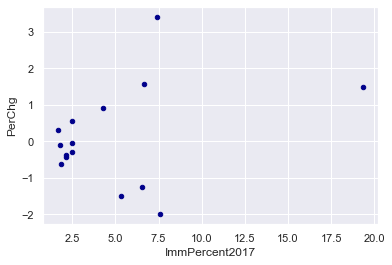

In [26]:
#creating Scatter Plot - proportion of immigration in 2017 by percent change from 2012 to 2017
ax1 = USImmigTop15.plot.scatter(x='ImmPercent2017',
                      y='PerChg',
                      c='DarkBlue')

In [27]:
USImmigTop15[['ImmPercent2017','PerChg']].iplot(kind = 'scatter' , mode = 'markers')

In [28]:
#Using "heatmap" to see correlations in data set
USImmigTop15.corr().iplot(kind='heatmap',colorscale="Blues",title ="Country Correlation Matrix")

In [31]:
#Plot categories to view relationships in the data via a "scatter plot" chart
USImmigTop15.iplot(kind="scatter", theme="white",x="PerChg",y="ImmPercent2017",
            categories="LastResidence",title="Top 10 Countries immigrants to US come from",xTitle='Percent Change from 2012 to 2017', yTitle='Proportion of Immigrants in 2017')